In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets('MNIST_data/',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
import tensorflow as tf

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]


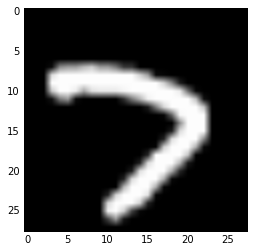

In [4]:
batch_xs,batch_ys=mnist.train.next_batch(1)
X=batch_xs.reshape([28,28])
print batch_ys
plt.gray()
plt.imshow(X)

In [5]:
x=tf.placeholder(tf.float32,[None,784])
W=tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))
y=tf.nn.softmax(tf.matmul(x,W)+b)

In [6]:
y_=tf.placeholder(tf.float32,[None,10])

In [7]:
cross_entropy=tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y),reduction_indices=[1]))
train_step=tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [8]:
sess=tf.InteractiveSession()
tf.global_variables_initializer().run()

In [9]:
for _ in range(1000):
    batch_xs,batch_ys=mnist.train.next_batch(100)
    sess.run(train_step,feed_dict={x : batch_xs,y_ : batch_ys})
    #print tf.reduce_mean(W)

In [10]:
correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))

In [11]:
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [12]:
print(sess.run(accuracy,feed_dict={x:mnist.test.images,y_:mnist.test.labels}))

0.9174
